# TP 2 Data mining


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importer les données

In [5]:
dataset = pd.read_csv('TP2 ex2data1.txt',names=["exam_score_1","exam_score_2","label"])
dataset

,exam_score_1,exam_score_2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [6]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
m , n = x.shape

# Visualisation des données

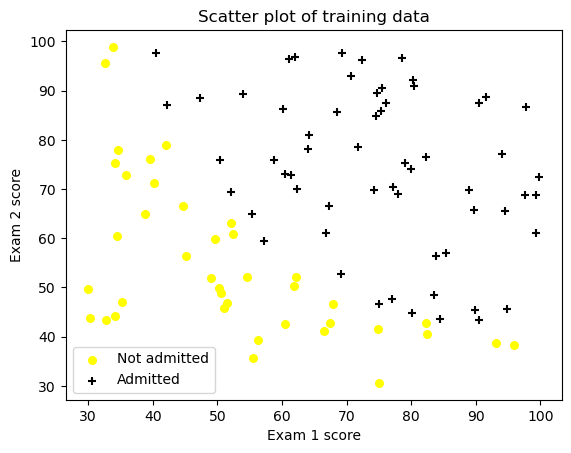

In [7]:
colors = {0:'yellow', 1:'black'}
markers = {0:'o', 1:'+'}
fig, ax = plt.subplots()
grouped = dataset.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='exam_score_1', y='exam_score_2', label=key, color=colors[key],marker=markers[key],s=30)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[0:], ['Not admitted', 'Admitted'])
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Scatter plot of training data')
plt.show()

# Logistic Model

In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [9]:
def model(x,theta):
    return np.dot(x,theta)

In [10]:
z = np.ones(m)
z = z.reshape(m,1)

x=np.append(z,x,axis=1)
x.shape

(100, 3)

In [11]:
m , n = x.shape
theta = np.zeros(n)
theta = theta.reshape(n,1)
y = y.reshape(-1 ,1)

# Cost Function


In [12]:
def fonction_cout(theta,x,y):
    infunc = -y*(np.log(sigmoid(model(x,theta)))) - (1-y)*(np.log(1 - sigmoid(model(x,theta))))
    j = np.sum(infunc)/m
    return j

In [13]:
 J = fonction_cout(theta,x,y)
 print(J) 

0.6931471805599453


# Gradient Descent

In [14]:
def grad(x , y , theta):
    m = len(y)
    return  (1/m) * x.T.dot(sigmoid(model(x,theta))-y)

In [15]:
 def gradientDescent(x , y , theta , alpha , iterations):
        j= np.zeros(iterations);
        for i in range(0 , iterations):
            theta = theta - (alpha) * grad(x,y,theta)
            j[i] = fonction_cout(theta,x,y);
        return theta , j

# Machine learning

In [16]:
iterations = 200000
alpha = 0.01
theta_finale, j = gradientDescent(x,y,theta,alpha,iterations)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9776\1073965880.py:2: RuntimeWarning: divide by zero encountered in log
  infunc = -y*(np.log(sigmoid(model(x,theta)))) - (1-y)*(np.log(1 - sigmoid(model(x,theta))))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9776\1073965880.py:2: RuntimeWarning: invalid value encountered in multiply
  infunc = -y*(np.log(sigmoid(model(x,theta)))) - (1-y)*(np.log(1 - sigmoid(model(x,theta))))


In [36]:
theta_finale

array([[-59.81043449],
       [  0.49797877],
       [  0.4908695 ]])

In [18]:
min(j)

0.22213845328403117

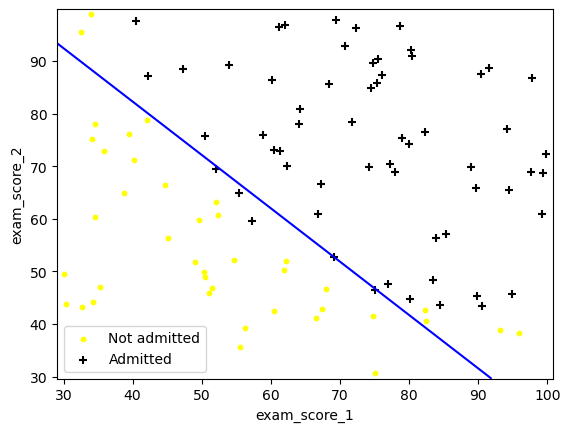

In [19]:
h = .02
colors = {0:'yellow', 1:'black'}
markers = {0:'.', 1:'+'}
fig, ax = plt.subplots()
grouped = dataset.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='exam_score_1', y='exam_score_2', label=key, color=colors[key],marker=markers[key],s=40)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[0:], ['Not admitted', 'Admitted'])

x_min, x_max = x[:, 1].min() - 1, x[:, 1].max() + 1
y_min, y_max = x[:, 2].min() - 1, x[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))


Z = theta_finale[0]+ theta_finale[1] *np.array(xx)+ theta_finale[2] *np.array(yy)

Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0.5], colors='blue')
plt.show()




In [31]:
def prediction(x1,x2):
    value =  theta_finale[0]+ theta_finale[1] * 45 + theta_finale[2] * 85
    pred =  sigmoid(value)
    if pred > 0.776:
        print("Admis")
    else:   
        print("Non Admis")
    

In [32]:
prediction(45,85)

Admis


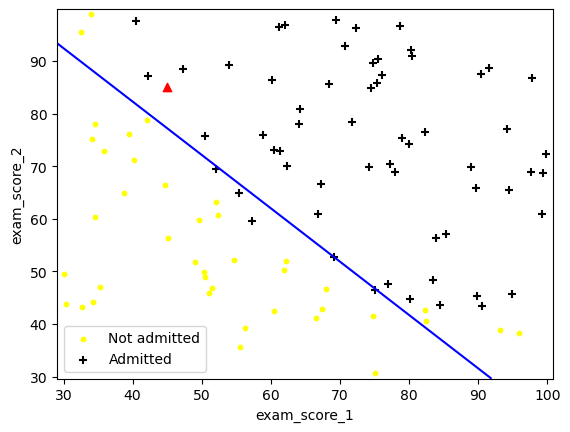

In [25]:
h = .02
colors = {0:'yellow', 1:'black'}
markers = {0:'.', 1:'+'}
fig, ax = plt.subplots()
grouped = dataset.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='exam_score_1', y='exam_score_2', label=key, color=colors[key],marker=markers[key],s=40)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[0:], ['Not admitted', 'Admitted'])

x_min, x_max = x[:, 1].min() - 1, x[:, 1].max() + 1
y_min, y_max = x[:, 2].min() - 1, x[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))


Z = theta_finale[0]+ theta_finale[1] *np.array(xx)+ theta_finale[2] *np.array(yy)

Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0.5], colors='blue')
plt.scatter(45,85,color='r',marker='^')
plt.show()
